This notebook contains the Exploratory Data Analysis that will feed the Machine Learning Pipeline as well as the app's data visualizations

In [2]:
import pandas as pd
import numpy as np

import sqlalchemy
import os

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
sns.set(rc = {'figure.figsize':(10,7.5)})

In [4]:
conn = sqlalchemy.create_engine('sqlite:///' + os.path.abspath('../data/DisasterResponse.db'))

In [5]:
df = pd.read_sql('SELECT * FROM ANALYTICAL_TABLE', conn)

df.set_index('index', inplace = True)

In [6]:
df.head()

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report,infered_language,message_clean
index,,,,,,,,,,,,,,,,,,,,,
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,en,weather update a cold front from cuba that cou...
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1,0,0,1,0,0,...,1,0,1,0,0,0,0,0,en,is the hurricane over or is it not over
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,no,looking for someone but no name
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,en,un reports leogane 80 90 destroyed only hospit...
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,en,says west side of haiti rest of the country to...


# Creating message length variable

In [7]:
df['message_len'] = df['message_clean'].str.len()

# How does message length behave between genres?

In [8]:
df['message_len'].describe()

count    26208.000000
mean       140.925252
std        203.142891
min          4.000000
25%         72.000000
50%        121.000000
75%        175.000000
max      10577.000000
Name: message_len, dtype: float64

In [9]:
for genre in df['genre'].unique():

    print(genre)

    display(df[df['genre'] == genre]['message_len'].describe())

direct


count    10762.000000
mean        86.642724
std         50.520445
min          4.000000
25%         49.000000
50%         72.000000
75%        113.000000
max        661.000000
Name: message_len, dtype: float64

social


count    2396.000000
mean      120.538815
std        73.187657
min        25.000000
25%        81.000000
50%       114.000000
75%       131.000000
max       926.000000
Name: message_len, dtype: float64

news


count    13050.000000
mean       189.433640
std        273.735542
min         29.000000
25%        119.000000
50%        162.000000
75%        213.000000
max      10577.000000
Name: message_len, dtype: float64

There are really large strings, but most of them are contained around a couple of hundred characters.  
News seem to have the longer messages, which makes sense.

In [10]:
df[df['message_len'] == 4]

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,floods,storm,fire,earthquake,cold,other_weather,direct_report,infered_language,message_clean,message_len
index,,,,,,,,,,,,,,,,,,,,,
12332,14439,PIDE .,PIDE . a,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,vi,pide,4


The len == 4 string is clearly an error. Will be dropped

In [11]:
df = df[df['id'] != '14439'].copy()

In [51]:
plot_message_len = df.groupby('genre', as_index = False)['message_len'].median()

<AxesSubplot: xlabel='genre', ylabel='message_len'>

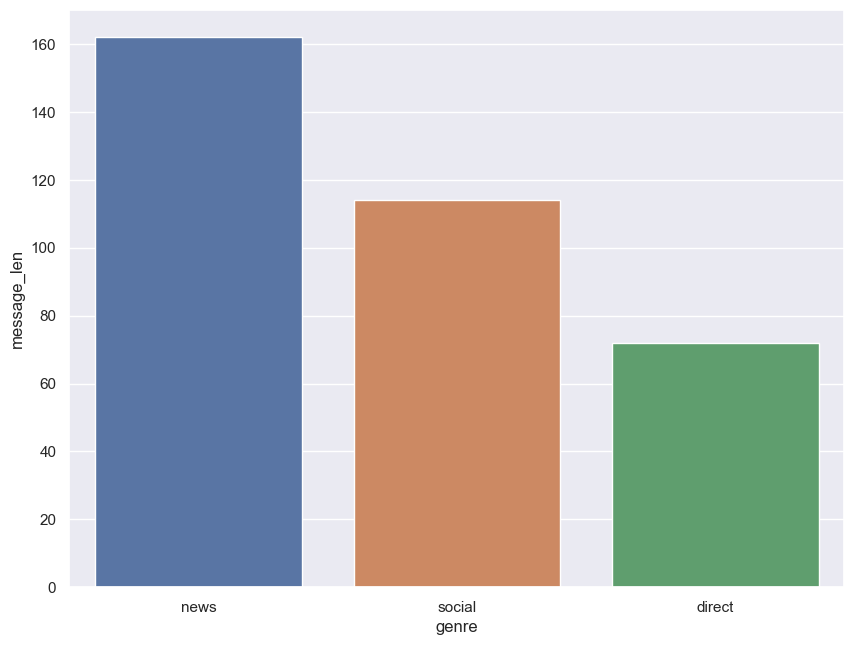

In [56]:
sns.barplot(data = plot_message_len.sort_values('message_len', ascending = False), x = 'genre', y = 'message_len')

# How do categories behave

In [36]:
cat_cols = df.columns[4:-3].to_list()

In [37]:
df[cat_cols].sum().sort_values(ascending = False)

related                   20088
aid_related               10859
weather_related            7297
direct_report              5074
request                    4474
other_aid                  3446
food                       2923
earthquake                 2455
storm                      2443
shelter                    2314
floods                     2155
medical_help               2083
infrastructure_related     1705
water                      1672
other_weather              1376
buildings                  1333
medical_products           1312
transport                  1201
death                      1194
other_infrastructure       1151
refugees                    875
military                    860
search_and_rescue           724
money                       604
electricity                 532
cold                        530
security                    471
clothing                    405
aid_centers                 309
missing_people              298
hospitals                   283
fire    

There is no data on child_alone category. Therefore it can't be predicted (there will be no training data on it).  
The most frequent column is the `related` column. We do not have access to the database documentation. So it is hard to know to what `related` represents.

In [ ]:
df.drop(columns = 'child_alone', inplace = True)

In [38]:
cat_cols.remove('child_alone')

ValueError: list.remove(x): x not in list

In [31]:
df.loc[df['related'] == 1, 'message'].sample(15, random_state=123).values

array(['So many cars heading north still. #Sandy http://t.co/STBJOKIKEffects of the Hurricane Sandy #instagood #tweegram #photooftheday #instamo @Congress and Palisade Bus Stop http://t.co/kvfEmWFS',
       'Cyclone Nargis swept inland Saturday, May 3 with 120 mile-per-hour winds, prompting a massive storm surge with waves up to 12 feet high.',
       'I am in Carefour Feuilles, Dkayet neighborhood. We need potable water because diarrhea is rampant here and is undermining our health. ',
       'Xinjiang was gripped by a cold snap from Jan. 1 to 8, which brought heavy snow and drastic temperature plunge especially in Tacheng and Altay regions.',
       'This has created favorable conditions for the ongoing agricultural campaign, but it has also increased the risk of flooding and mudflows due to snow melting over the course of the spring.',
       "Heavy rains and snow also fell on South Africa's southern region on Wednesday, blocking roads and spurring rescue attempts to save stranded m

In [30]:
df.loc[df['related'] == 0, 'message'].sample(15, random_state=123).values

array(['why are you insensitive to my cries? ',
       'The tripartite repatriation agreement signed by Senegal, Mauritania and UNHCR in November 2007 stated that repatriated Mauritanians should have their citizenship papers within three months of their arrival.',
       'It can be accessed at www.dad.tafren.gov.lk',
       'Quotation documentation for the geophysical survey required before drilling can start has been completed this week and will be distributed beginning of next.',
       'organisation union SARAZIN U.P.S I NEED TO REGISTER ',
       'Good morning tell me where I can change the venezuela money ',
       'Quick=ADdisbursing resources for activities such as project design would be supported and would facilitate on-budget implementation.',
       'US marines were flying around 20 helicopters from the amphibious assault vessel the USS Kearsarge.',
       'NOTES: The person joking, the message is not important.',
       "Urine can be used directly as fertilizer because its 

It looks like `related` actually refers to useful messages (related to disasters).  
The classes are clearly unbalanced

In [48]:
frequent_cats = df[cat_cols].sum()\
                            .sort_values(ascending = False)\
                            .head(10)

frequent_cats = frequent_cats.reset_index()

frequent_cats.rename(columns = {'index':'Category', 0:'Count'}, inplace = True)

<AxesSubplot: xlabel='Category', ylabel='Count'>

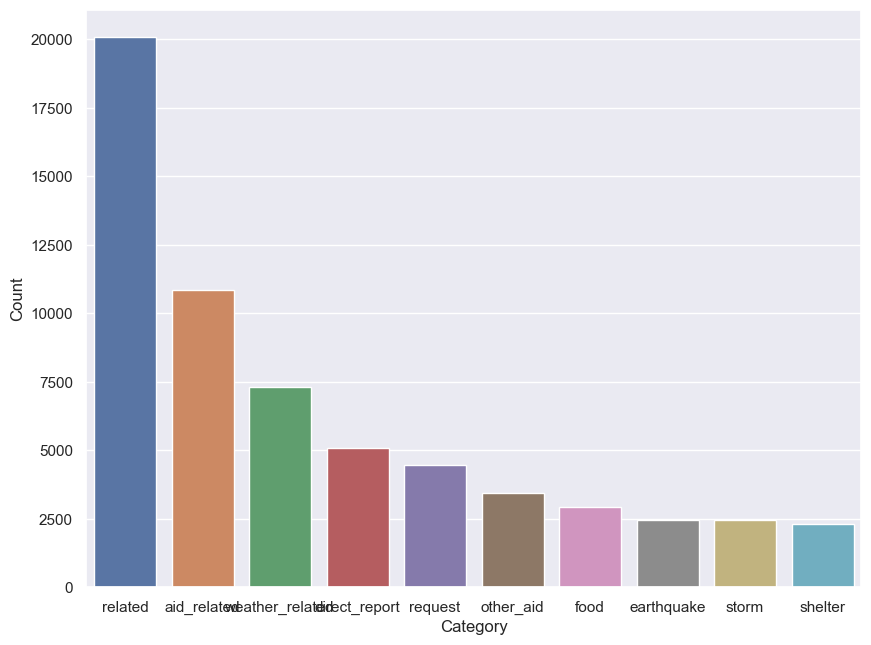

In [49]:
sns.barplot(data = frequent_cats,
            x = 'Category',
            y = 'Count')

# ML Experiments

In [57]:
df.head()

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,floods,storm,fire,earthquake,cold,other_weather,direct_report,infered_language,message_clean,message_len
index,,,,,,,,,,,,,,,,,,,,,
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,en,weather update a cold front from cuba that cou...,64
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1,0,0,1,0,0,...,0,1,0,0,0,0,0,en,is the hurricane over or is it not over,39
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,no,looking for someone but no name,31
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,1,1,0,1,0,1,...,0,0,0,0,0,0,0,en,un reports leogane 80 90 destroyed only hospit...,96
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,en,says west side of haiti rest of the country to...,61


In [58]:
language_filter = df['infered_language'] == 'en'

corpus_col = 'message_clean'

In [59]:
X = df.loc[language_filter, corpus_col]

y = df[cat_cols]

In [61]:
X.head()

index
0    weather update a cold front from cuba that cou...
1              is the hurricane over or is it not over
3    un reports leogane 80 90 destroyed only hospit...
4    says west side of haiti rest of the country to...
5                information about the national palace
Name: message_clean, dtype: object

In [62]:
y.head()

,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,water,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
index,,,,,,,,,,,,,,,,,,,,,
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
